In [79]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt
import networkx as nx

def create_Lap(edgelist,n):
    """
    this function creates the Laplacian Matrix
    
    Argument: edgelist, number of entry in the row and column
    
    Return: Laplacian Matrix
    """
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

# def scatter_eigenvec(L, p, q):
#     (eigvalue, eigvec) = np.linalg.eig(L)
#     sort_eigvec = eigvec[:, eigvalue.argsort()]
#     vec1 = sort_eigvec[:, p-1]
#     vec2 = sort_eigvec[:, q-1]
#     plt.scatter(vec1, vec2)

# def plot_edge_sort_eigvec(sort_eigvec, q, , edgelist):
#     vec1 = sorted_eigvec[:, p-1]
#     vec2 = sorted_eigvec[:, q-1]
#     for j,k in edgelist:
#         plt.plot(vec1[[j,k]],vec2[[j,k]])
#     plt.show()
    
def plot_edge_eigenvec(L, p, q, edgelist):
    (eigvalue, eigvec) = np.linalg.eig(L)
    sort_eigvec = eigvec[:, eigvalue.argsort()]
    vec1 = sort_eigvec[:, p-1]
    vec2 = sort_eigvec[:, q-1]
    plt.scatter(vec1, vec2)
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()
    

In [80]:
def create_Lap_sparse(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    L = sparse.csr_matrix(L)
    return L

def plot_edge_eigenvec_sparse(L, p, q, edgelist):
    """
    this function both scatters the pth and qth eigenvectors of sparse Laplacian Matrix
    
    and plots edges accodring to edgelist 
    
    Argument: Sparse Lapacian Matrix, pth eigenvectors in sorted sparse matrix, qth eigenvectors in sorted sparse matrix
    
    Notes: eigenvectors are sorted by lowest to highes values of eigenvalues in the sparse matrix
    """
    vals, vecs = sparse.linalg.eigsh(L, which = 'SM')
    plt.scatter(vecs[:,p-1],vecs[:,q-1])
    vec1 = vecs[:,p-1]
    vec2 = vecs[:,q-1]
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()
    

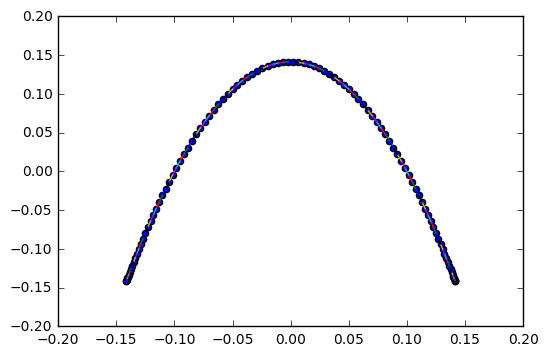

In [85]:
n = 100
edgelist = [[i,i+1] for i in range(n-1)]
L = create_Lap(edgelist, n)
plot_edge_eigenvec(L, 2, 3, edgelist)

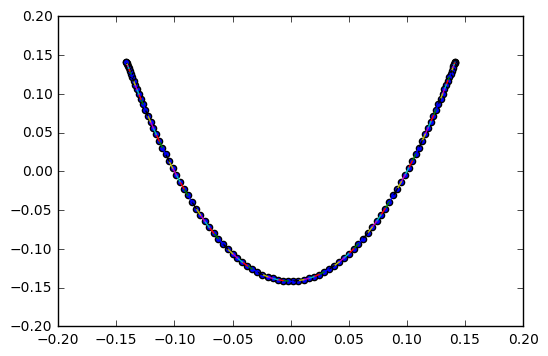

In [86]:
L = create_Lap_sparse(edgelist, n)
plot_edge_eigenvec_sparse(L, 2, 3, edgelist)

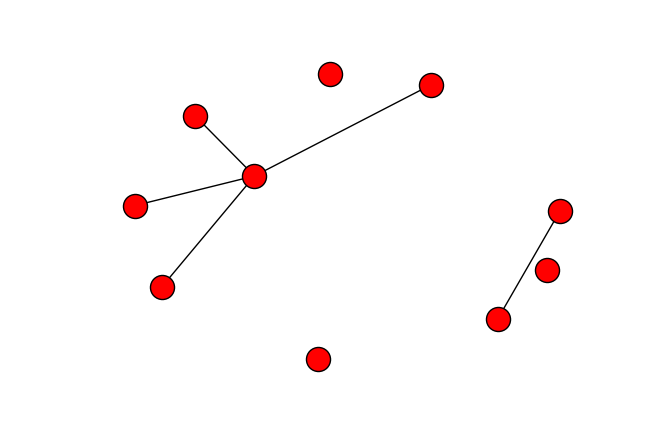

In [83]:
#Produces a graph picked randomly out of the set of all graphs with n nodes and m edges
n = 10
m = 5
D = nx.gnm_random_graph(n, m)
nx.draw(D)
plt.show()
edgelist = D.edges()

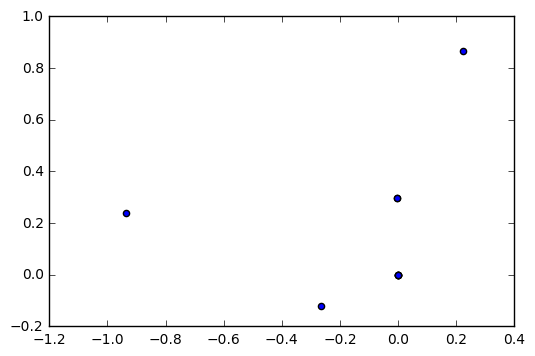

In [63]:
L = create_Lap_sparse(edgelist, n)
plot_edge_eigenvec_sparse(L, 2, 3, edgelist)

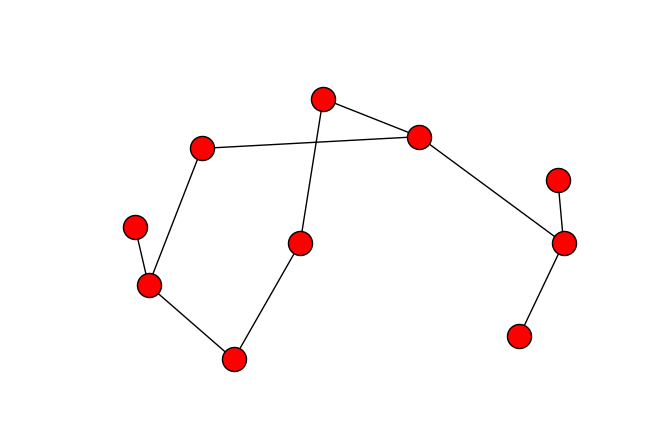

In [74]:
n = 10
m = 2
E = nx.watts_strogatz_graph(n, m, 1)
nx.draw(E)
plt.show()
edgelist = E.edges() 

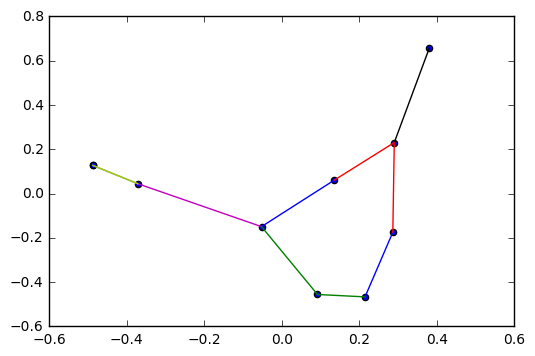

In [75]:
L = create_Lap_sparse(edgelist, n)
plot_edge_eigenvec_sparse(L, 2, 3, edgelist)